# Python数据结构

基于Python Tutorial 3.7.3详述Python数据结构.

## List - 列表

append(x) - 追加在列表末尾, 相当于 a[len(a):] = [x]

extend(iterable) - 参数集合追加原列表末尾, 相当于 a[len(a):] = iterable

insert(i, x) - 指定索引位置插入

remove(x) - 删除指定元素, 空列表报错 ValueError

pop([i]) - 指定索引位置抛出, 删除并返回元素, 默认会列表最后一个元素

clear() - 删除所有元素, 相当于 del a[:]

index(x[,start[,end]]) - 获取某元素列表第一个索引, 不存在则报错 ValueError

count(x) - 获取某元素在列表中个数

sort(key=None, reverse=False) - 排序, 可使用 sorted()自定义排序规则

reverse() - 反转列表元素

copy() - 浅复制, 相当于 a[:], 常用于迭代时操作列表的情况

insert/remove/sort, 默认返回为 None. Python中所有可变数据结构的设计原则

In [28]:
a = [1, 2, 3, 4, 3, 4, 5, 7]
print(a.index(3, 3, 5)) # 指定区间, 某元素索引位置. 注意索引仍是相对于原列表
print(a.count(3))
a.remove(3) # 根据 value 删除 list-item
print(a)
# del statement
del a[2:4] # 根据 index 删除 list-item
print(a)
del a[:]
print(a)
del a
print(a)
print(a.index(1))

4
2
[1, 2, 4, 3, 4, 5, 7]
[1, 2, 4, 5, 7]
[]


NameError: name 'a' is not defined

### 列表用作栈(后进先出) - append(x) + pop()

### 列表用作队列(先进先出) - collections.deque

list列表末尾追加和弹出很快,但从列表的开头进行插入/弹出却很慢,因为所有的元素都将移动.这是可以使用collections.deque,设计为快速追加和从两端弹出的队列.

In [15]:
from collections import deque
queue = deque(['Jerry', 'Tom', 'Lincoln', 'Ring'])
queue.append('Machel')
print(queue.popleft())
print(queue)

Jerry
deque(['Tom', 'Lincoln', 'Ring', 'Machel'])


### List Comprehensions

In [18]:
squares1 = []
for x in range(10):
    squares1.append(x ** 2)
print(squares1)
squares2 = list(map(lambda x : x ** 2, range(10)))
print(squares2)
squares3 = [x **2 for x in range(10)]
print(squares3)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [19]:
listcomp = [(x, y) for x in [1, 2, 3] for y in [3, 1, 4] if x!=y]
print(listcomp)

[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]


In [20]:
listcomp = []
for x in [1, 2, 3]:
    for y in [3, 1, 4]:
        if x != y :
            listcomp.append((x, y))
print(listcomp)

[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]


In [21]:
vec = [-4, -2, 0, 2, 4]
double_vec = [x*2 for x in vec]
filter_negative_vec = [x for x in vec if x >= 0]
abs_vec = [abs(x) for x in vec]
freshfruit = ['  banana', '  loganberry ', 'passion fruit  ']
strip_fresh_fruit = [x.strip() for x in freshfruit]
number_square = [(x, x**2) for x in range(6)]
vec = [[1,2,3], [4,5,6], [7,8,9]]
vec_item_square = [x**2 for items in vec for x in items]
print(double_vec)
print(filter_negative_vec)
print(abs_vec)
print(strip_fresh_fruit)
print(number_square)
print(vec_item_square)

[-8, -4, 0, 4, 8]
[0, 2, 4]
[4, 2, 0, 2, 4]
['banana', 'loganberry', 'passion fruit']
[(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]
[1, 4, 9, 16, 25, 36, 49, 64, 81]


In [22]:
from math import pi
pi_str = [str(round(pi, x)) for x in range(1, 6)]
print(pi_str)

['3.1', '3.14', '3.142', '3.1416', '3.14159']


### Nested List Comprehensions

In [25]:
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
]
transpose_matrix = [[row[i] for row in matrix] for i in range(4)]
print(transpose_matrix)
transposed = []
for i in range(4):
    transposed.append([row[i] for row in matrix])
print(transposed)
zip_matrix = list(zip(*matrix)) # zip() built-in method 内置函数
print(zip_matrix)

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]
[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]
[(1, 5, 9), (2, 6, 10), (3, 7, 11), (4, 8, 12)]


## Tuples and Sequences

Tuples may be nested.

Tuples are immutable. Just like Enumeration

In [29]:
t = 12345, 24567, 45633
print(t[0])
print(t)

12345
(12345, 24567, 45633)


In [36]:
t = ([1, 2, 3], [2, 4, 6]) # () 亦可省略
t[0][0] = 6 # tuple为 immutable, 但其 item 为list - mutable
print(t)
t[1] = [2, 8, 64] # tuple 为 immutable, 不可变对象, 报错TypesError
print(t)

([6, 2, 3], [2, 4, 6])


TypeError: 'tuple' object does not support item assignment

In [48]:
empty = () # empty tuple
error_example = ('tom') # str 
singleton = ('tom',) # tuple with one item
print(len(empty))
print(len(error_example))
print(len(singleton))
print(type(error_example))
print(type(singleton))
multiple_tuple = 123, 345, 'Hello' # 打包
x, y, z = multiple_tuple # 解包 - 注意匹配元组长度
print(x)
print(y)
print(z)

0
3
1
<class 'str'>
<class 'tuple'>
123
345
Hello


## Sets 集合

Set集合, 无序, 去重, 支持数学运算. 注意:空集合,需使用set()声明.

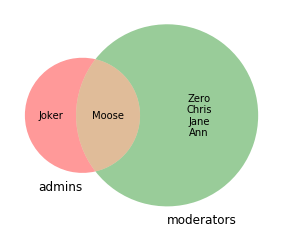

In [3]:
import sys
# 加载自定义文件路径下的包和模块到python的sys.path
sys.path.append('/home/lab/anaconda3/lib/python3.7/site-packages')
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

admins = {'Moose', 'Joker', 'Joker'}
moderators = {'Ann', 'Chris', 'Jane', 'Moose', 'Zero'}

v = venn2(subsets=(admins, moderators), set_labels=('admins', 'moderators'))
v.get_label_by_id('11').set_text('\n'.join(admins & moderators))
v.get_label_by_id('10').set_text('\n'.join(admins - moderators))
v.get_label_by_id('01').set_text('\n'.join(moderators - admins))

plt.show() # 饼状图 展示交集/差集

In [3]:
curly_braces_dict = {} # dict
curly_braces_set = set() # empty set
print(type(curly_braces_set))
print(type(curly_braces_dict))

<class 'set'>
<class 'dict'>


Similarly to list comprehensions, set comprehensions are also supported:

In [4]:
a = {x for x in 'abracadabra' if x not in 'abc'}
print(a)

{'d', 'r'}


## Dictionaries - 字典

不同于序列以数字为索引, dic以不可变类型组成的keys为索引.

dictionary == key:value(键值对)组成的set(集合),且keys为set,即key具有唯一性.

list(d)/sorted(d) - 返回keys组成的list, 只是sorted(d)是有序的.

In [5]:
tel = {'jack': 4098, 'sape': 4139}
tel['guido'] = 4127 # 新增指定key的key:value
print(tel)
print(tel['jack'])
del tel['sape'] # 删除指定key的key:value
tel['irv'] = 4217
print(tel)
print(list(tel)) # keys组成的list
print(sorted(tel)) # keys组成的排序后的list
print('guido' in tel) # dic是否包含指定key
print('jack' not in tel)
# key-value 序列转dic
dict_test = dict([('sape', 4139), ('guido', 4127), ('jack', 4098)])
print(dict_test)
# dic comprehensions is useful too
print({x: x**2 for x in range(1, 5)})
# 使用关键词参数指定key-value,转换dic
print(dict(sape=4139, guido=4127, jack=4098)) 

{'jack': 4098, 'sape': 4139, 'guido': 4127}
4098
{'jack': 4098, 'guido': 4127, 'irv': 4217}
['jack', 'guido', 'irv']
['guido', 'irv', 'jack']
True
False
{'sape': 4139, 'guido': 4127, 'jack': 4098}
{1: 1, 2: 4, 3: 9, 4: 16}
{'sape': 4139, 'guido': 4127, 'jack': 4098}


## Looping Techniques - 循环技术

In [6]:
# dict - 使用items(),同时检索key/value
knights = {'gallahad': 'the pure', 'robin': 'the brave'}
for k, v in knights.items():
    print(k, v)

gallahad the pure
robin the brave


In [7]:
sequence = ['tic', 'tac', 'toe']
# 迭代序列时, 使用enumerate()同时检索index/value *****
for i, v in enumerate(sequence):
    print(i, v)

0 tic
1 tac
2 toe


In [8]:
questions = ['name', 'quest', 'favorite color']
answers = ['lancelot', 'the holy grail', 'blue']
# 两个或两个以上序列, 组对循环使用zip()
for q, a in zip(questions, answers):
    print('What is your {0}?  It is {1}.'.format(q, a))

What is your name?  It is lancelot.
What is your quest?  It is the holy grail.
What is your favorite color?  It is blue.


In [10]:
# 逆序迭代循环,使用reversed()
for i in reversed(range(1, 8, 2)):
    print(i)

7
5
3
1


In [11]:
# 迭代序列时返回有序唯一元素,使用针对set的sorted()方法
basket = ['apple', 'orange', 'apple', 'pear', 'orange', 'banana']
for f in sorted(set(basket)):
    print(f)

apple
banana
orange
pear


In [13]:
# 循环试图更改一个序列时,更安全/简便的方式是创建新的序列,或者循环序列的浅复制
# a[:] / copy() 都可完成浅复制, 官方推荐新建序列去接受
import math
raw_data = [56.2, float('NaN'), 51.7, 55.3, 52.5, float('NaN'), 47.8]
filtered_data = []
for value in raw_data:
    if not math.isnan(value):
        filtered_data.append(value)
print(filtered_data)
# list使用filter()配合lambda表达式处理元素的过滤
filter_data = list(filter(lambda x: not math.isnan(x), raw_data))
print(filter_data)

[56.2, 51.7, 55.3, 52.5, 47.8]
[56.2, 51.7, 55.3, 52.5, 47.8]


## More on Conditions & Comparing Sequences & Other Types

In [18]:
# 数值运算符优先级大于比较运算符
# in/not in 判断某值是否存在于序列 
# is/is not 比较两个对象类型是否相同,多用于list一类的可变类型对象
# 比较运算符可链式(chain)编程
# condition operators priority: numerical > comparison > boolean
# Boolean Operator : not > and > or
print(not 1 + 3 in [4, 5])
print(not 4 + 9 < 11)
# 可将比较结果赋值给某个变量
string1, string2, string3 = '', 'Trondheim', 'Hammer Dance'
non_null = string1 or string2 or string3
print(non_null)

False
True
Trondheim


In [21]:
a = 22
# 注意: python中赋值操作不能出现在表达式中, 同种情况在C/Java是可行的
if (a = 66) > 11:
    print(a)

SyntaxError: invalid syntax (<ipython-input-21-fc99fbd80dbe>, line 2)

In [24]:
# 序列比较时,按照编辑顺序一一比较
print((1, 2, 3)              < (1, 2, 4))
print([1, 2, 3]              < [1, 2, 4])
print('ABC' < 'C' < 'Pascal' < 'Python') # A < C < P then Pa < Py
print((1, 2, 3, 4)           < (1, 2, 4))
print((1, 2)                 < (1, 2, -1)) # 前一序列先没牌
print((1, 2, 3)             == (1.0, 2.0, 3.0))
print((1, 2, ('aa', 'ab'))   < (1, 2, ('abc', 'a'), 4))
# Note: ('aa', 'ab') < ('abc', 'a')

True
True
True
True
True
True
True
